In [2]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report 

In [3]:
#Loading the dataset
data=pd.read_csv('C:\\Users\\RAKA SEN\\Desktop\\Classification project\\bank-additional-full.csv',sep=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We know that there are no missing values in the dataset. Now we shall deal with duplicate data entries.

## Dealing with Duplicate Data

In [4]:
data_dup = data[data.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [5]:
data_dup.shape

(12, 21)

So we have 12 rows which are duplicates. We will drop these duplicate rows before proceeding further.

In [6]:
data = data.drop_duplicates()
data.shape

(41176, 21)

## Separating Explanatory and Target Variables

In [7]:
data_x = data.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = data["y"]
print("Shape of Y:", data_y.shape)

Shape of X: (41176, 20)
Shape of Y: (41176,)


## Splitting Train and Test Dataset

In [8]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (26352, 20)
X CV: (6588, 20)
X Test: (8236, 20)
Y Train: (26352,)
Y CV: (6588,)
Y Test: (8236,)


In [9]:
# Replace "no" with 0 and "yes" with 1

y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

## ENCODING CATEGORICAL FEATURES

## One-Hot Encoding Categorical Features

In [10]:
# Categorical boolean mask
categorical_feature_mask = data_x.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_x.columns[categorical_feature_mask].tolist()

In [11]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
    This is added specifically because when using GridSearchCV or RandomizedSearchCV,
    we only split the dataset into train and test to give more data to training purposes.
    This is done because GridSearchCV splits the data internally anyway.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Cross validation dataset
    if include_cv:
      temp_cols = Vectorizer.transform(X_cv[i])
      X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)

In [13]:
OneHotEncoder(categorical_cols, X_train, X_test, X_cv, True)

# Drop the categorical features as the one hot encoded representation is present
X_train = X_train.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of CV: ", X_cv.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job


<ipython-input-12-6acfbba1fb90>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colname] = sparse[:, i].toarray().ravel().tolist()


Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Shape of train:  (26352, 63)
Shape of CV:  (6588, 63)
Shape of test:  (8236, 63)


In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26352 entries, 11000 to 37542
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            26352 non-null  int64  
 1   duration                       26352 non-null  int64  
 2   campaign                       26352 non-null  int64  
 3   pdays                          26352 non-null  int64  
 4   previous                       26352 non-null  int64  
 5   emp.var.rate                   26352 non-null  float64
 6   cons.price.idx                 26352 non-null  float64
 7   cons.conf.idx                  26352 non-null  float64
 8   euribor3m                      26352 non-null  float64
 9   nr.employed                    26352 non-null  float64
 10  job_admin.                     26352 non-null  int64  
 11  job_blue-collar                26352 non-null  int64  
 12  job_entrepreneur               26352 non-n

## MODELLING THE DATA

We will create a simple LogisticRegression model without any hyper-parameter tuning and apply that to the data in two ways.

1. Use "Duration" feature to see how the model performs with this feature. It will probably give very high AUC as the duration feature is very correlated with the target variable. But obviously we can't use the Duration feature for actual modelling.
2. Next remove the "Duration" feature, and apply the same model to check how the model performs.

Here, we build the Logistic Regression model and evaluate it using the ROC curve and the AUC values. Since we know that the positive and the negative class are heavily imbalanced, the ROC curve and the AUC values are appropriate evaluation metrics as compared to the accuracy. For all the future models, the ROC curve and the AUC values are used as the evaluation metric.

## MODELLING WITH THE 'DURATION' COLUMN

In [15]:
# with "duration" column
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score with duration column: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score with duration column:  0.9326257847068605


C:\Users\RAKA SEN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As we can see that, with the 'duration' column the AUC score is very good, 0.933. Now, let us develop the model without using the 'Duration' column.

## MODELLING WITHOUT THE 'DURATAION' COLUMN

In [16]:
# Removing duration feature 

# From Train
X_train = X_train.drop("duration", axis=1)
print("The shape of the train dataset: ", X_train.shape)

# From CV
X_cv = X_cv.drop("duration", axis=1)
print("The shape of the cv dataset: ", X_cv.shape)

# From Test
X_test = X_test.drop("duration", axis=1)
print("The shape of the test dataset: ", X_test.shape)

The shape of the train dataset:  (26352, 62)
The shape of the cv dataset:  (6588, 62)
The shape of the test dataset:  (8236, 62)


In [17]:
# without "duration" column and without class balancing
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score without duration column and without class balancing: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score without duration column and without class balancing:  0.7721713495553403


C:\Users\RAKA SEN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\RAKA SEN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC score without duration column and with class balancing:  0.7895417395612992


<IPython.core.display.Javascript object>


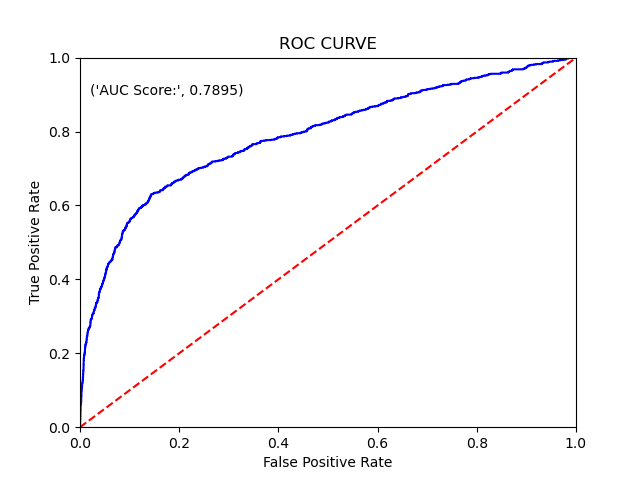

In [18]:
# without "duration" column and with class balancing
# X_train = X_train.drop("duration", axis=1)
# X_test = X_test.drop("duration", axis=1)

# print(X_train.shape)
# print(X_test.shape)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
p1=model.predict(X_test)
y_pred = model.predict_proba(X_test)

print("AUC score without duration column and with class balancing: ", roc_auc_score(y_test, y_pred[:,1]))
preds=y_pred[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

plt.title('ROC CURVE')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.text(x=0.02,y=0.9, s=('AUC Score:',round(metrics.roc_auc_score(y_test, preds),4)))
plt.show()

In [19]:
# print classification report 
print(classification_report(y_test, p1)) 

cm = confusion_matrix(y_test, p1)

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7322
           1       0.33      0.64      0.44       914

    accuracy                           0.82      8236
   macro avg       0.64      0.74      0.66      8236
weighted avg       0.88      0.82      0.84      8236



In [20]:
score_card= pd.DataFrame(columns=["Model Name",'Prob.Cutoff',"Stability", 'AUC', 'Precision', 'Recall',
                                       'Accuracy', 'Kappa', 'f1-score'])
def update_score_card(Model_name,model,cutoff='-',stability="Stable"):
    p1 = model.predict(X_test)
    y_pred1 = [ 0 if x < cutoff else 1 for x in p1]
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    'AUC' : metrics.roc_auc_score(y_test, preds),
                                    'Precision': metrics.precision_score(y_test, y_pred1),
                                    'Recall': metrics.recall_score(y_test, y_pred1),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred1),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred1),
                                    'f1-score': metrics.f1_score(y_test, y_pred1)}, 
                                    ignore_index = True)
    return score_card


In [21]:
fpr, tpr, thresholds= metrics.roc_curve(y_test, p1)
youdens_table= pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.641138,0.162934,1,0.478204
1,0.000000,0.000000,2,0.000000
2,1.000000,1.000000,0,0.000000


In [22]:
bin_y_pred= [ 0 if x < 0.464492 else 1 for x in p1]
print(classification_report(y_test, bin_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7322
           1       0.33      0.64      0.44       914

    accuracy                           0.82      8236
   macro avg       0.64      0.74      0.66      8236
weighted avg       0.88      0.82      0.84      8236



In [23]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

<IPython.core.display.Javascript object>


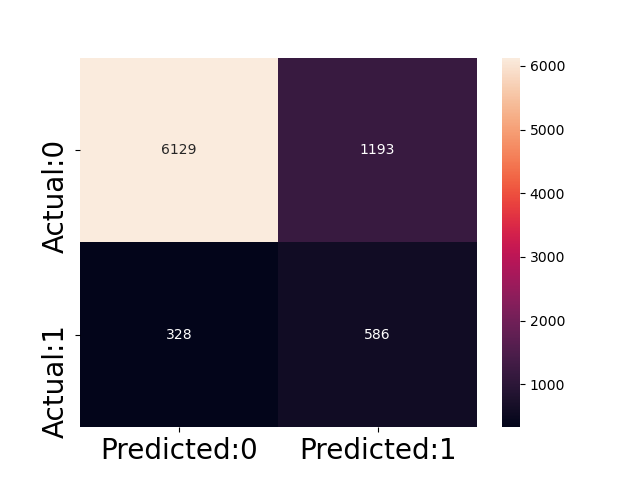

In [24]:
cm= confusion_matrix(y_test, bin_y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [25]:
TN= cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
precision = TP / (TP+FP)
print('Precision:',precision)
recall = TP / (TP+FN)
print('Recall:',recall)
specificity = TN / (TN+FP)
print('Specificity:',specificity)
f1_score = 2*((precision*recall)/(precision+recall))
print('f1_score:',f1_score)
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy:',accuracy)

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, bin_y_pred)
print('Cohens Kappa value:',kappa)

Precision: 0.32939853850477796
Recall: 0.6411378555798687
Specificity: 0.8370663753072931
f1_score: 0.435202376531749
Accuracy: 0.8153229723166586
Cohens Kappa value: 0.33816234717503635


In [26]:
update_score_card("Simple Logistic Regression",model,cutoff=0.46449,stability="Stable")

,Model Name,Prob.Cutoff,Stability,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Logistic Regression,0.46449,Stable,0.789542,0.329399,0.641138,0.815323,0.338162,0.435202


## LOGISTIC REGRESSION

Tuning the hyperparameters to obtain the best regularization parameter.

C:\Users\RAKA SEN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\RAKA SEN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

AUC for k =  1e-05 is 0.7490113689998623
AUC for k =  0.0001 is 0.755277926501744
AUC for k =  0.001 is 0.7711457534662823
AUC for k =  0.01 is 0.7733973341922951
AUC for k =  0.1 is 0.7713188993397416
AUC for k =  1 is 0.7758521731175861
AUC for k =  10 is 0.7739411810464809
AUC for k =  100 is 0.7726203449366922
AUC for k =  1000 is 0.7738207317432048


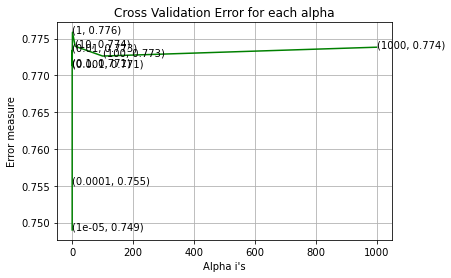

C:\Users\RAKA SEN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\RAKA SEN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

For values of best alpha =  1 The train AUC is: 0.7868982129492186
For values of best alpha =  1 The cross validation AUC is: 0.7758521731175861
For values of best alpha =  1 The test AUC is: 0.7859736132885695


C:\Users\RAKA SEN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))